<a href="https://colab.research.google.com/github/IdentityLost/Machine-Learning-Geniric-Virus-Backprop/blob/main/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импортирование библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Предобработка данных

In [ ]:
data = pd.read_excel('data_new.xlsx')

In [ ]:
data.drop(columns=['Автор' ,'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis = 1, inplace=True)

In [ ]:
data.columns = ['id', 'docs', 'registrationDate', 'data_initial', 'adresat', 'description', 'prim', 'author', 'autor_company']

In [ ]:
data

,id,docs,registrationDate,data_initial,adresat,description,prim,author,autor_company
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,NaN,Антонова С.В.,АО «Интерфакс»)
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,NaN,Картошкин С.А.,Министерство просвещения Российской Федерации)
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,NaN,Цивилев С.Е.,Администрация Кемеровской области)
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,NaN,Волков Г.А.,Министерство транспорта Российской Федерации)
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,NaN,Атанов И.В.,Ставропольский государственный аграрный универ...
...,...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,2017-11-01,11\n20.10.2017,Уразов Р.Н.,Протокол заседания Президиума Совета при Прези...,NaN,Медведев Д.А.,Аппарат Правительства Российской Федерации)
4963,4964,WSR/1.-1751/2017,2017-11-01,ТС-1164/06\n31.10.2017,Уразов Р.Н.,О проведении 21.11.2017 заседания организацион...,NaN,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...
4964,4965,WSR/1.-1748/2017,2017-11-01,ЛО-95/06пр,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,NaN,Огородова Л.М.,Министерство образования и науки Российской Фе...
4965,4966,WSR/1.-1747/2017,2017-11-01,ЛО-93/06пр\n24.10.2017,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,NaN,Огородова Л.М.,Министерство образования и науки Российской Фе...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                4967 non-null   int64         
 1   docs              4965 non-null   object        
 2   registrationDate  4965 non-null   datetime64[ns]
 3   data_initial      4967 non-null   object        
 4   adresat           4967 non-null   object        
 5   description       4967 non-null   object        
 6   prim              308 non-null    object        
 7   author            4967 non-null   object        
 8   autor_company     4966 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 349.4+ KB


In [ ]:
data_next_step_1 = data.loc[:,['docs','registrationDate', 'adresat', 'description', 'author', 'autor_company']]

In [ ]:
data_next_step_1

,docs,registrationDate,adresat,description,author,autor_company
0,WSR/1-838/2019,2019-04-09,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,Антонова С.В.,АО «Интерфакс»)
1,WSR/1-837/2019,2019-04-09,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,Картошкин С.А.,Министерство просвещения Российской Федерации)
2,WSR/1-835/2019,2019-04-09,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,Цивилев С.Е.,Администрация Кемеровской области)
3,WSR/1-834/2019,2019-04-09,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,Волков Г.А.,Министерство транспорта Российской Федерации)
4,WSR/1-833/2019,2019-04-09,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,Атанов И.В.,Ставропольский государственный аграрный универ...
...,...,...,...,...,...,...
4962,WSR/1.-1749/2017,2017-11-01,Уразов Р.Н.,Протокол заседания Президиума Совета при Прези...,Медведев Д.А.,Аппарат Правительства Российской Федерации)
4963,WSR/1.-1751/2017,2017-11-01,Уразов Р.Н.,О проведении 21.11.2017 заседания организацион...,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...
4964,WSR/1.-1748/2017,2017-11-01,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,Огородова Л.М.,Министерство образования и науки Российской Фе...
4965,WSR/1.-1747/2017,2017-11-01,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,Огородова Л.М.,Министерство образования и науки Российской Фе...


In [ ]:
data_next_step_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   docs              4965 non-null   object        
 1   registrationDate  4965 non-null   datetime64[ns]
 2   adresat           4967 non-null   object        
 3   description       4967 non-null   object        
 4   author            4967 non-null   object        
 5   autor_company     4966 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 233.0+ KB


In [ ]:
data_next_step_1.dropna(axis=0, inplace=True)

In [ ]:
data_next_step_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4964 entries, 0 to 4965
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   docs              4964 non-null   object        
 1   registrationDate  4964 non-null   datetime64[ns]
 2   adresat           4964 non-null   object        
 3   description       4964 non-null   object        
 4   author            4964 non-null   object        
 5   autor_company     4964 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 271.5+ KB


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def normolize_data(df):
  df = df.str.lower()
  df.replace(r'[^а-яА-Яa-zA-Z0-9]', ' ', regex = True, inplace = True)
  stop_words = stopwords.words("russian")
  df = df.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
  return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_next_step_1['docs'] = normolize_data(data_next_step_1['docs'])
data_next_step_1['adresat'] = normolize_data(data_next_step_1['adresat'])
data_next_step_1['description'] = normolize_data(data_next_step_1['description'])
data_next_step_1['author'] = normolize_data(data_next_step_1['author'])
data_next_step_1['autor_company'] = normolize_data(data_next_step_1['autor_company'])

In [ ]:
data_next_step_1.to_csv('Ready1.csv')

## Создание вектора слов

In [ ]:
import csv
from sklearn.feature_extraction.text import CountVectorizer


stop_words = stopwords.words('russian')
cv = CountVectorizer(stop_words = stop_words)

vec_dict = cv.fit_transform(data_next_step_1['description']).toarray()
my_dict = cv.vocabulary_



with open('dict_csv.csv', 'w', encoding='utf-16') as file:
  w = csv.DictWriter(file, my_dict.keys())
  w.writeheader()
  w.writerow(my_dict)

In [ ]:
df_dict = pd.DataFrame(dict(zip(my_dict.keys(), my_dict.items())))

In [ ]:
df_dict

,вх,возможности,использования,сетевого,издания,информационный,ресурс,спарк,работе,союза,участии,совещании,вопросу,доработки,фэо,предоставления,субсидии,реализацию,проекта,билет,будущее,апр,2019,командировании,саликовой,глушко,участия,заседании,оргкомитета,проведения,фнч,кемеровской,области,22,чемпионате,мира,профессиональному,мастерству,стандартам,ворлдскиллс,...,итограм,кавказском,откруге,2035,ускорении,согласованию,приветственное,слово,шевченко,статус,членами,оснащению,стандларта,промышоенного,радиочастотным,возражения,исковое,завление,т03,использовать,выставочного,московский,экзаме,кадылевой,жилищной,файзулину,съемок,класс,омской,отсрочках,май,лушие,дуального,дирекцией,рогодской,присутствии,предполагается,стратегическому,проектам,протокольного
0,вх,возможности,использования,сетевого,издания,информационный,ресурс,спарк,работе,союза,участии,совещании,вопросу,доработки,фэо,предоставления,субсидии,реализацию,проекта,билет,будущее,апр,2019,командировании,саликовой,глушко,участия,заседании,оргкомитета,проведения,фнч,кемеровской,области,22,чемпионате,мира,профессиональному,мастерству,стандартам,ворлдскиллс,...,итограм,кавказском,откруге,2035,ускорении,согласованию,приветственное,слово,шевченко,статус,членами,оснащению,стандларта,промышоенного,радиочастотным,возражения,исковое,завление,т03,использовать,выставочного,московский,экзаме,кадылевой,жилищной,файзулину,съемок,класс,омской,отсрочках,май,лушие,дуального,дирекцией,рогодской,присутствии,предполагается,стратегическому,проектам,протокольного
1,918,823,1699,4254,1553,1657,4057,4462,3885,4454,4930,4338,858,1287,5064,3503,4599,3987,3721,620,661,511,83,1898,4146,1021,4933,1477,2857,3678,5033,1835,2648,107,5158,2341,3806,2204,4534,862,...,1726,1742,2949,96,4885,4365,3580,4296,5203,4548,5180,2889,4539,3766,3902,834,1685,1385,4642,1700,964,2408,5227,1753,1369,4969,4639,1854,2791,2978,2179,2169,1319,1202,4082,3658,3509,4575,3722,3790


## Начало классификации с помощью K-neightbors

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

class TextSelector(BaseEstimator, TransformerMixin):
  def __init__(self, key):
    self.key = key
  def fit(self, X):
    return self
  def transform(self, X, y = None):
    return X[self.key]

from nltk.stem.snowball import SnowballStemmer
import re

stemmer = SnowballStemmer('russian')

def stemming_tokenizer(text):
  text = re.split('\W+', text)
  text = [stemmer.stem(word) for word in text]
  return text

In [ ]:
stop_words_s=stopwords.words('russian')

des = Pipeline([('selector', TextSelector(key='description')),
                  ('tfidf', TfidfVectorizer(stop_words=stop_words_s, tokenizer=stemming_tokenizer))
                ])

des.fit_transform(data_next_step_1)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['бол', 'больш', 'будт', 'быт', 'вед', 'впроч', 'всег', 'всегд', 'даж', 'друг', 'е', 'ег', 'ем', 'есл', 'ест', 'ещ', 'зач', 'зде', 'ил', 'иногд', 'когд', 'конечн', 'куд', 'лучш', 'межд', 'мен', 'мног', 'мо', 'можн', 'нег', 'нельз', 'нибуд', 'никогд', 'нич', 'опя', 'посл', 'пот', 'почт', 'разв', 'сво', 'себ', 'совс', 'теб', 'тепер', 'тог', 'тогд', 'тож', 'тольк', 'хорош', 'хот', 'чег', 'чут', 'эт'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<4964x3284 sparse matrix of type '<class 'numpy.float64'>'
	with 50695 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.pipeline import FeatureUnion
feat_full = FeatureUnion([('description', des)])
feat_process = Pipeline([('feat_full', feat_full)])
x = feat_process.fit_transform(data_next_step_1).toarray()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state=0)
pca_feat = pca.fit_transform(x)

In [ ]:
X = pca_feat

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(data_next_step_1['adresat'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

## Визуализация с помощью облака слов

(-0.5, 399.5, 199.5, -0.5)

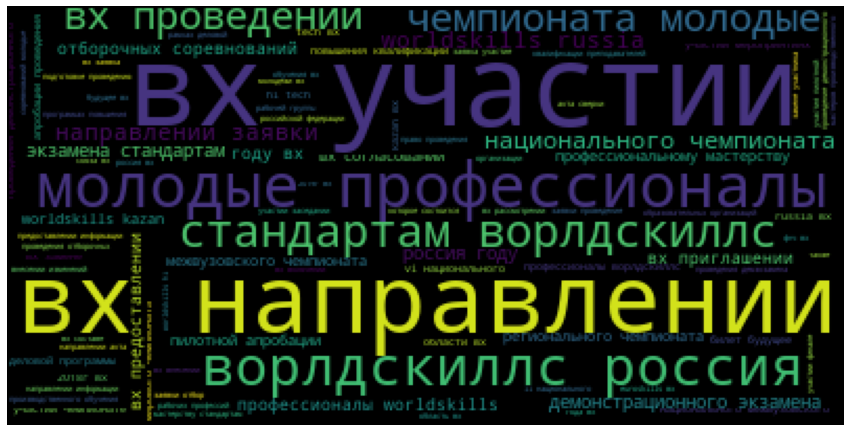

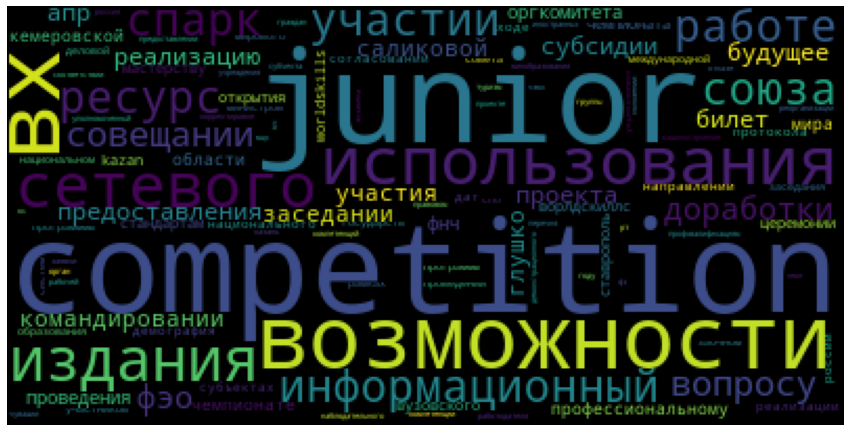

In [ ]:
text1 = ' '.join(data_next_step_1['description'])
text2 = ' '.join(my_dict.keys())

from wordcloud import WordCloud

cloud = WordCloud(stopwords=stop_words_s).generate(text1)
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
cloud = WordCloud(stopwords=stop_words_s).generate(text2)
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

# Построение модели и ее обучение

In [ ]:
train_score = []
val_score = []

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=2000, tol=1e-2))
clf.fit(x_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
train_score.append(clf.score(x_train, y_train))
val_score.append(clf.score(x_test, y_test))
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.67      0.80         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          18       0.46      0.34      0.39       291
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         8
          33       0.00      0.00      0.00         1
          35       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_score = []
val_score = []

clf2 = RandomForestClassifier(max_depth=200, random_state=0)
clf2.fit(x_train, y_train)
train_score.append(clf2.score(x_train, y_train))
val_score.append(clf2.score(x_test, y_test))
print(classification_report(y_test, clf2.predict(x_test)))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          18       0.69      0.74      0.72       291
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         1
          30       1.00      1.00      1.00         1
          32       0.00      0.00      0.00         8
          33       0.00      0.00      0.00         1
          35       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
